In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [330]:
match_data = pd.read_csv("C:/Users/Hp Pavilion/OneDrive - vit.ac.in/Desktop/IPL Dataset and Code/IPL Matches 2008-2020.csv")
ball_data = pd.read_csv("C:/Users/Hp Pavilion/OneDrive - vit.ac.in/Desktop/IPL Dataset and Code/IPL Ball-by-Ball 2008-2020.csv")

In [331]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


ball_data.head()

In [332]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [220]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [11]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [221]:
match_data.shape

(816, 17)

In [222]:
ball_data.shape

(193468, 18)

In [223]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [224]:
print("Matches played so far:", match_data.shape[0])

Matches played so far: 816


In [225]:
print("Matches played at various locations so far:", match_data['city'].unique())

Matches played at various locations so far: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [226]:
print("Teams that are participated so far in the league :", match_data['team1'].unique())

Teams that are participated so far in the league : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [227]:
match_data['season']= pd.DatetimeIndex(match_data['date']).year

In [214]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,Wickets,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,Wickets,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,Wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,Wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,Wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [228]:
matches_per_season = match_data.groupby(['season'])['id'].count().reset_index()

In [63]:
matches_per_season

,season,id
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [229]:
matches_player_by_each_team = match_data.groupby(['team1'])['id'].count().reset_index().rename(columns={'id':'count'})

In [68]:
matches_player_by_each_team

,team1,count
0,Chennai Super Kings,94
1,Deccan Chargers,39
2,Delhi Capitals,19
3,Delhi Daredevils,83
4,Gujarat Lions,16
5,Kings XI Punjab,92
6,Kochi Tuskers Kerala,7
7,Kolkata Knight Riders,95
8,Mumbai Indians,97
9,Pune Warriors,23


In [69]:
matches_player_columns={'team1' : 'Teams',
       'count' : 'count_for'}

In [70]:
matches_player_by_each_team.rename(columns = matches_player_columns)

,Teams,count_for
0,Chennai Super Kings,94
1,Deccan Chargers,39
2,Delhi Capitals,19
3,Delhi Daredevils,83
4,Gujarat Lions,16
5,Kings XI Punjab,92
6,Kochi Tuskers Kerala,7
7,Kolkata Knight Riders,95
8,Mumbai Indians,97
9,Pune Warriors,23


C:\Users\Hp Pavilion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'matches playes in each season')

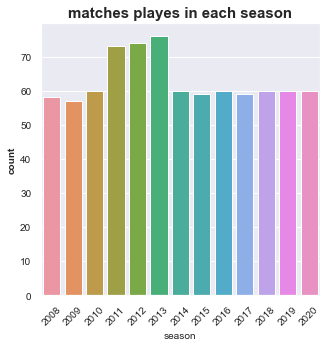

In [230]:
sns.countplot(match_data['season'])
plt.xticks(rotation=45,fontsize =10)
plt.yticks(fontsize =10)
plt.xlabel('season',fontsize=10)
plt.ylabel('count',fontsize=10,fontweight ='bold')
plt.title('matches playes in each season',fontsize = 15,fontweight = 'bold')

In [120]:
season_data= match_data[['id','season']].merge(ball_data, left_on = 'id', right_on = 'id', how = 'left').drop('id',axis = 1)

In [148]:
season_data

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [329]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,DA Warner,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,DA Warner,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,DA Warner,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,DA Warner,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,DA Warner,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [118]:
season1 = season_data.groupby(['season'])['total_runs'].sum().reset_index()

In [119]:
p=season1.set_index('season')
p

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


Text(0.5, 1.0, 'total runs in each season')

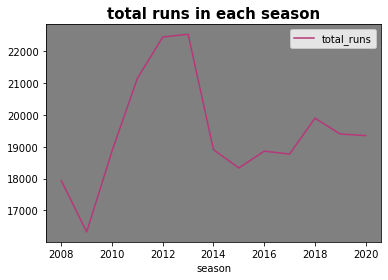

In [114]:
ax =plt.axes()
ax.set(facecolor = "grey")
sns.lineplot(data=p, palette= 'magma')
plt.title("total runs in each season",fontsize =15, fontweight ='bold')

In [233]:
runs_per_season = pd.concat([matches_per_season,season1.iloc[:,1]],axis=1)
runs_per_season
runs_per_season['runs_scored_per_match']=runs_per_season['total_runs']/runs_per_season['id']

In [234]:
match_per_season = match_data.groupby(['season'])['id'].count().reset_index()

In [235]:
runs_per_season

,season,id,total_runs,runs_scored_per_match
0,2008,58,17937,309.258621
1,2009,57,16320,286.315789
2,2010,60,18864,314.400000
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22541,296.592105
6,2014,60,18909,315.150000
7,2015,59,18332,310.711864
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


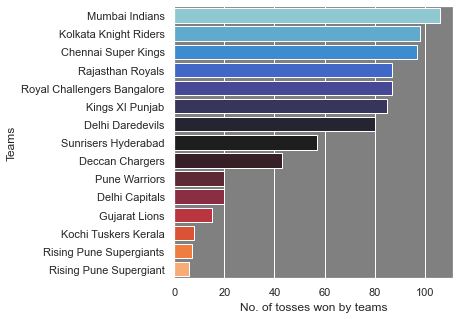

In [236]:
toss =match_data['toss_winner'].value_counts()
ax=plt.axes()
ax.set(facecolor='grey')
sns.barplot(x=toss,y=toss.index,palette ='icefire',saturation =1)
plt.xlabel('No. of tosses won by teams')
plt.ylabel('Teams')
sns.set(rc={'figure.figsize':(5,5)},style = 'darkgrid')
plt.show()

In [136]:
toss

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Rajasthan Royals                87
Royal Challengers Bangalore     87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

Text(0, 0.5, 'count')

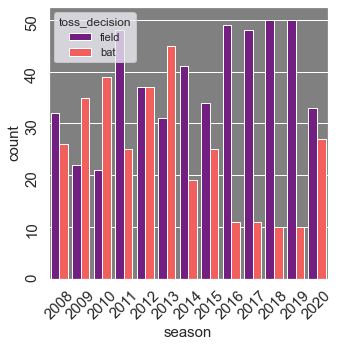

In [237]:
ax=plt.axes()
ax.set(facecolor='grey')
sns.countplot(x='season',hue='toss_decision',data=match_data, palette='magma',saturation=1)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('season',fontsize=15)
plt.ylabel('count',fontsize='15')

In [241]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [244]:
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [259]:
match_data.venue[match_data.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

In [270]:
match_data.venue[match_data.toss_winner=='Sunrisers Hyderabad'][match_data.winner=='Sunrisers Hyderabad'].mode()

0    Rajiv Gandhi International Stadium, Uppal
dtype: object

In [267]:
[match_data.winner=='Sunrisers_Hyderabad']

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 811    False
 812    False
 813    False
 814     True
 815    False
 Name: winner, Length: 816, dtype: bool]

In [276]:
match_data.winner[match_data.result!='runs'].value_counts()

Mumbai Indians                 58
Kolkata Knight Riders          58
Royal Challengers Bangalore    53
Chennai Super Kings            53
Rajasthan Royals               53
Kings XI Punjab                48
Delhi Daredevils               42
Sunrisers Hyderabad            32
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                 10
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [282]:
match_data.winner[match_data.result!='wickets'].value_counts()

Mumbai Indians                 64
Chennai Super Kings            53
Kings XI Punjab                43
Kolkata Knight Riders          42
Royal Challengers Bangalore    40
Sunrisers Hyderabad            35
Rajasthan Royals               30
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                 11
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [288]:
toss=match_data['toss_winner']==match_data['winner']

C:\Users\Hp Pavilion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

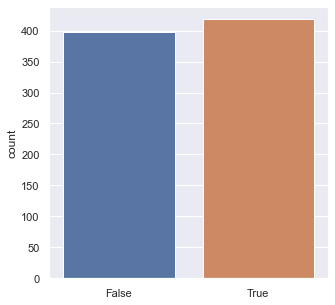

In [293]:
toss
plt.figure(figsize=(5,5))
sns.countplot(toss)

C:\Users\Hp Pavilion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

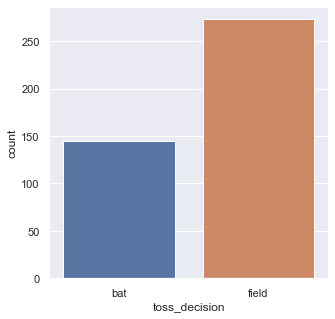

In [294]:
plt.figure(figsize=(5,5))
sns.countplot(match_data.toss_decision[match_data.toss_winner==match_data.winner])

In [308]:
player= ball_data['batsman']=='DA Warner'

In [309]:
player

0         True
1         True
2         True
3         True
4         True
          ... 
193463    True
193464    True
193465    True
193466    True
193467    True
Name: batsman, Length: 193468, dtype: bool

In [310]:
player1=ball_data[player]

In [311]:
player1

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,DA Warner,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,DA Warner,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,DA Warner,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,DA Warner,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,DA Warner,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,DA Warner,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,DA Warner,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,DA Warner,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,DA Warner,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


<AxesSubplot:ylabel='dismissal_kind'>

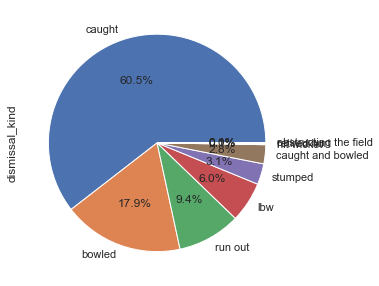

In [325]:
player1['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%')

In [349]:
runs= ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)

In [343]:
y

,Batsman,runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

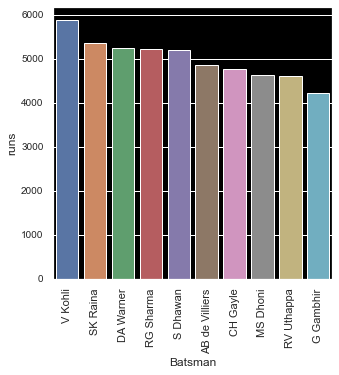

In [354]:
ax=plt.axes()
ax.set(facecolor='black')
sns.barplot(x=y['Batsman'],y=y['runs'])
plt.xticks(rotation=90)
plt.yticks(fontsize=10)